# Введение в искусственные нейронные сети
# Урок 2. Keras

Давайте попробуем получить датасет Fashion-MNIST и проанализировать его содержимое.

Набор из 60 000 полутоновых изображений 28х28 серого цвета 10 категорий моды, а также тестовый набор из 10 000 изображений. Этот набор данных может быть использован в качестве замены MNIST. Классовые метки:
Метка	Описание

0	футболка/клубка

1	Брюки

2	Пуловер

3	Платье

4	Пальто

5	Сандал

6	Рубашка

7	Кроссовок

8	Сумка

9	Ботинок

In [1]:
import numpy as np
import keras
from keras.datasets import fashion_mnist
from keras.utils import plot_model
from keras.models import Sequential # тип модели - линейная
from keras.layers import Dense # тип слоя - полносвязный
from keras.utils import to_categorical # переход от labelE к OHE

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Что в данном случае мы смогли с вами узнать? Что тренировочный датасет Fashion-MNIST состоит из 60000 изображений 28 на 28 пикселей. Тестовый набор состоит из 10 000 изображений 28 на 28 пикселей

Нам теперь нужно конверитировать значения пикселей из вида от 1 до 255 в набор значений от -1 до 1.



In [3]:
# Normalize the images.
train_images = (train_images / 127) - 1
test_images = (test_images / 127) - 1

# Flatten the images. изменили формат данных
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [4]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

**Создание модели**

Давайте попрубуем сделать нейросеть на Keras использую полученные выше знания. Попробуем обучить нейросеть различать рукописные цифры.

In [36]:
# Build the model.
model6 = Sequential([Dense(256, activation='relu', input_shape=(784,)),Dense(128, activation='relu'),Dense(128, activation='relu'),Dense(10, activation='softmax'),])

# Compile the model.
model6.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
# Train the model.
hh6 = model6.fit(
  train_images,
  y_t,
  epochs=30,
  batch_size=32, validation_split=0.2
)

# Evaluate the model.
model6.evaluate(
  test_images,
  y_tt
)

# Predict on the first 5 test images.
predictions = model6.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [9 2 1 1 6]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [9 2 1 1 6]

In [ ]:
#model1 = Sequential([Dense(128, activation='relu', input_shape=(784,)),Dense(64, activation='relu'),Dense(10, activation='softmax'),])
#model2 = Sequential([Dense(64, activation='tanh', input_shape=(784,)), Dense(64, activation='tanh'), Dense(10, activation='softmax')])
#model3 = Sequential([Dense(256, activation='relu', input_shape=(784,)),Dense(128, activation='relu'),Dense(10, activation='softmax'),])
#model4 = Sequential([Dense(256, activation='tanh', input_shape=(784,)),Dense(128, activation='tanh'),Dense(10, activation='softmax'),])
#model5 = Sequential([Dense(256, activation='tanh', input_shape=(784,)),Dense(128, activation='tanh'),Dense(128, activation='tanh'),Dense(10, activation='softmax'),])
#model6 = Sequential([Dense(256, activation='relu', input_shape=(784,)),Dense(128, activation='relu'),Dense(128, activation='relu'),Dense(10, activation='softmax'),])

#hh1 - 30 эпох - построить зависимость accuracy от номера эпохи model1
#hh2 - 30 эпох - построить зависимость accuracy от номера эпохи model2
#hh3 - 30 эпох - построить зависимость accuracy от номера эпохи model3
#hh4 - 30 эпох - построить зависимость accuracy от номера эпохи model4
#hh5 - 30 эпох - построить зависимость accuracy от номера эпохи model5
#hh6 - 30 эпох - построить зависимость accuracy от номера эпохи model6

In [12]:
import matplotlib.pyplot as plt

In [11]:
a1 = hh1.history['val_accuracy']
a2 = hh2.history['val_accuracy']
a3 = hh3.history['val_accuracy']
a4 = hh4.history['val_accuracy']
a5 = hh5.history['val_accuracy']
a6 = hh6.history['val_accuracy']

In [13]:
b1 = hh1.history['val_loss']
b2 = hh2.history['val_loss']
b3 = hh3.history['val_loss']
b4 = hh4.history['val_loss']
b5 = hh5.history['val_loss']
b6 = hh6.history['val_loss']

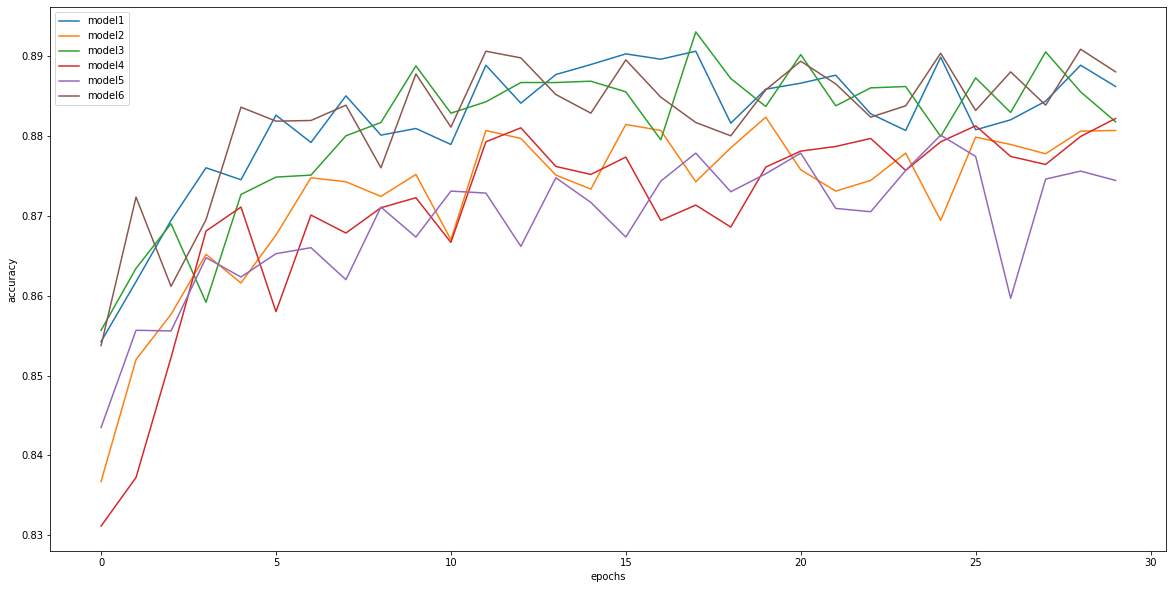

In [14]:
plt.figure(figsize=(20,10))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(a1, label = 'model1')
plt.plot(a2, label = 'model2')
plt.plot(a3, label = 'model3')
plt.plot(a4, label = 'model4')
plt.plot(a5, label = 'model5')
plt.plot(a6, label = 'model6')
plt.legend()
plt.show()

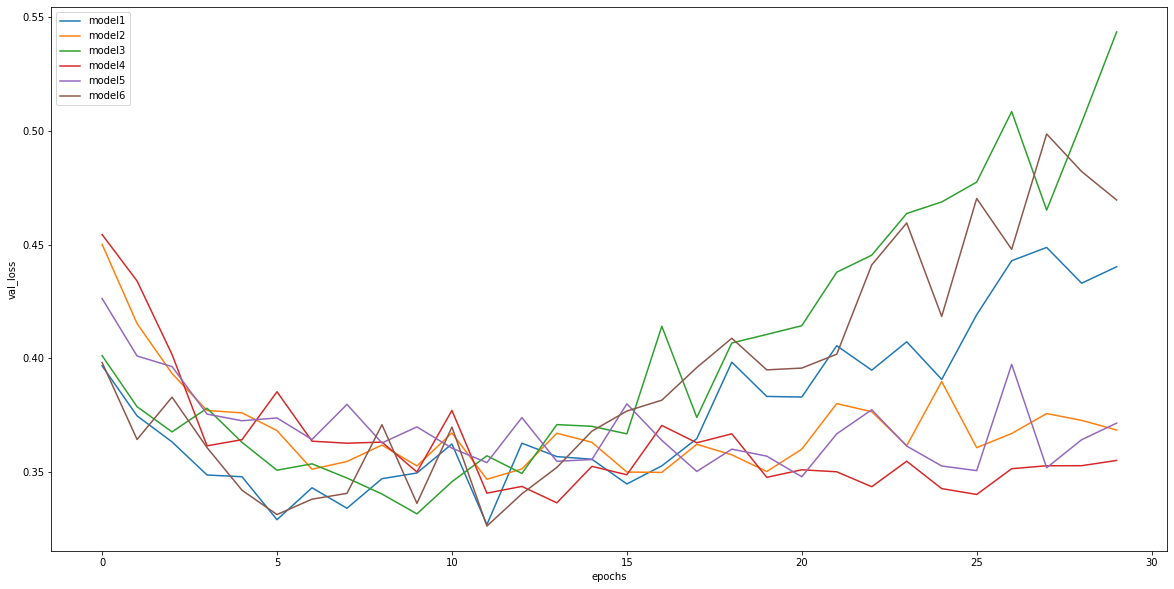

In [16]:
plt.figure(figsize=(20,10))
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.plot(b1, label = 'model1')
plt.plot(b2, label = 'model2')
plt.plot(b3, label = 'model3')
plt.plot(b4, label = 'model4')
plt.plot(b5, label = 'model5')
plt.plot(b6, label = 'model6')
plt.legend()
plt.show()

По результатам видим, что метрика растет с увеличением эпох в обучении модели(примерно до 15 эпох), а дальше значение метрики практически не изменяется, а ошибка уменьшается до 15 эпох, а дпльше растет

Берем модель(model3), показавшую лучший результат и смотрим зависимость метрики от количества нейронов 

In [ ]:
# Build the model.
model18 = Sequential([Dense(1024, activation='relu', input_shape=(784,)),Dense(1024, activation='relu'),Dense(10, activation='softmax'),])# Compile the model.
model18.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
# Train the model.
hh18 = model18.fit(
  train_images,
  y_t,
  epochs=15,
  batch_size=32, validation_split=0.2
)
# Evaluate the model.
model18.evaluate(
  test_images,
  y_tt
)
# Predict on the first 5 test images.
predictions = model18.predict(test_images[:5])
# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [9 2 1 1 6]
# Check our predictions against the ground truths.
print(test_labels[:5]) # [9 2 1 1 6]

In [ ]:
#h11 model11 = Sequential([Dense(32, activation='relu', input_shape=(784,)),Dense(32, activation='relu'),Dense(10, activation='softmax'),])
#h12 model12 = Sequential([Dense(64, activation='relu', input_shape=(784,)),Dense(32, activation='relu'),Dense(10, activation='softmax'),])
#h13 model13 = Sequential([Dense(128, activation='relu', input_shape=(784,)),Dense(32, activation='relu'),Dense(10, activation='softmax'),])
#h14 model14 = Sequential([Dense(256, activation='relu', input_shape=(784,)),Dense(32, activation='relu'),Dense(10, activation='softmax'),])
#h15 model15 = Sequential([Dense(512, activation='relu', input_shape=(784,)),Dense(32, activation='relu'),Dense(10, activation='softmax'),])
#h16 model16 = Sequential([Dense(64, activation='relu', input_shape=(784,)),Dense(64, activation='relu'),Dense(10, activation='softmax'),])
#h17 model17 = Sequential([Dense(128, activation='relu', input_shape=(784,)),Dense(128, activation='relu'),Dense(10, activation='softmax'),])
#h18 model18 = Sequential([Dense(1024, activation='relu', input_shape=(784,)),Dense(1024, activation='relu'),Dense(10, activation='softmax'),])

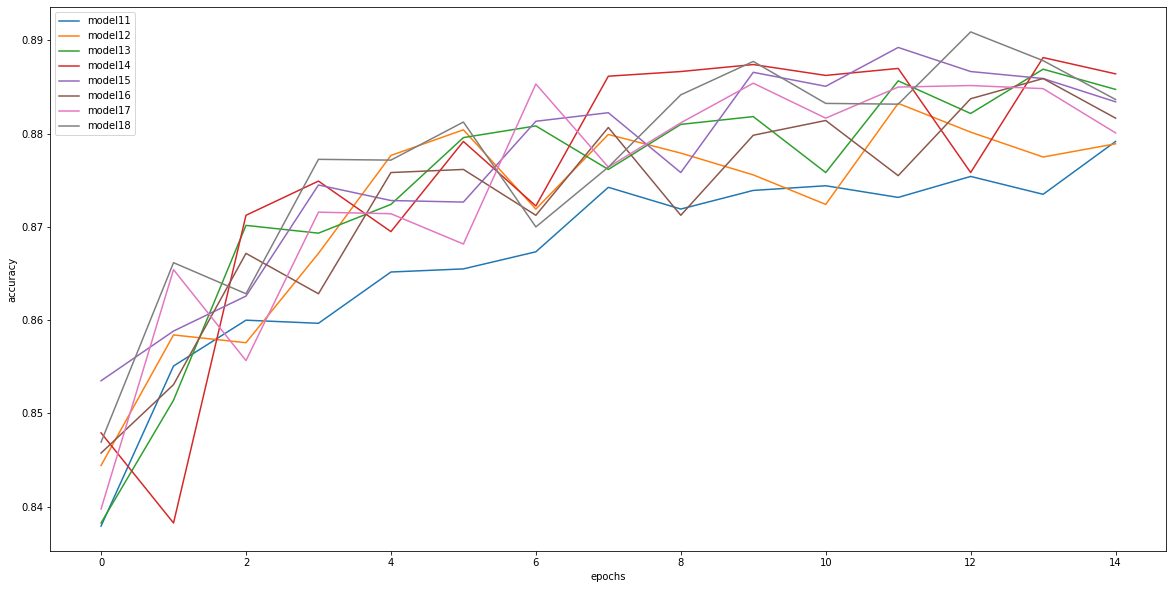

In [57]:
a11 = hh11.history['val_accuracy']
a12 = hh12.history['val_accuracy']
a13 = hh13.history['val_accuracy']
a14 = hh14.history['val_accuracy']
a15 = hh15.history['val_accuracy']
a16 = hh16.history['val_accuracy']
a17 = hh17.history['val_accuracy']
a18 = hh18.history['val_accuracy']
plt.figure(figsize=(20,10))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(a11, label = 'model11')
plt.plot(a12, label = 'model12')
plt.plot(a13, label = 'model13')
plt.plot(a14, label = 'model14')
plt.plot(a15, label = 'model15')
plt.plot(a16, label = 'model16')
plt.plot(a17, label = 'model17')
plt.plot(a18, label = 'model18')
plt.legend()
plt.show()

18, 14, 13 - показали лучшее решение и у них большее количество нейронов
Таким образом, количество нейронов улучшает качество модели

In [ ]:
# Build the model.
model28 = Sequential([Dense(1024, activation='relu', input_shape=(784,)),Dense(1024, activation='relu'),Dense(10, activation='softmax'),])# Compile the model.
model28.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
# Train the model.
hh28 = model28.fit(
  train_images,
  y_t,
  epochs=15,
  batch_size=200, validation_split=0.2
)
# Evaluate the model.
model28.evaluate(
  test_images,
  y_tt
)
# Predict on the first 5 test images.
predictions = model28.predict(test_images[:5])
# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [9 2 1 1 6]
# Check our predictions against the ground truths.
print(test_labels[:5]) # [9 2 1 1 6]

In [ ]:
#model21 = Sequential([Dense(1024, activation='relu', input_shape=(784,)),Dense(1024, activation='relu'),Dense(10, activation='softmax'),])# Compile the model.
#h21 batch_size=16
#h22 batch_size=30
#h23 batch_size=50
#h24 batch_size=100
#h25 batch_size=120
#h26 batch_size=150
#h27 batch_size=170
#h28 batch_size=200

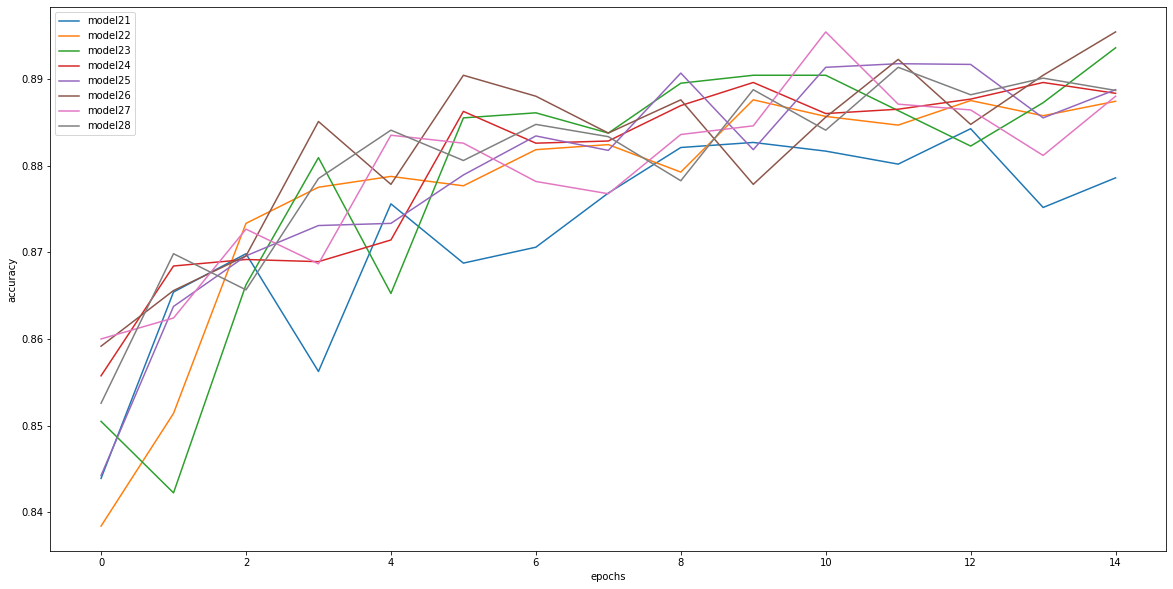

In [73]:
a21 = hh21.history['val_accuracy']
a22 = hh22.history['val_accuracy']
a23 = hh23.history['val_accuracy']
a24 = hh24.history['val_accuracy']
a25 = hh25.history['val_accuracy']
a26 = hh26.history['val_accuracy']
a27 = hh27.history['val_accuracy']
a28 = hh28.history['val_accuracy']
plt.figure(figsize=(20,10))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(a21, label = 'model21')
plt.plot(a22, label = 'model22')
plt.plot(a23, label = 'model23')
plt.plot(a24, label = 'model24')
plt.plot(a25, label = 'model25')
plt.plot(a26, label = 'model26')
plt.plot(a27, label = 'model27')
plt.plot(a28, label = 'model28')
plt.legend()
plt.show()

Лучше результаты у моделей - 150 бранчей